In [1]:
!date # starting time

Fri Jul 22 09:14:34 EDT 2022


In [2]:
# ! pip install rdkit-pypi
# ! pip install --pre deepchem

# ! pip install umap
# ! pip install llvmlite==0.34.0  --ignore-installed
# ! pip install umap-learn
# ! pip install molvs
# ! pip install bravado

In [3]:
# import deepchem as dc
# print(dc.__version__)

# # get the Install AMPL_GPU_test.sh
# !wget 'https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh'

# # run the script to install AMPL
# ! chmod u+x install_AMPL_GPU_test.sh
# ! ./install_AMPL_GPU_test.sh

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
import pandas as pd
import os, getpass
import requests
import copy

%matplotlib inline
# manipulate data
import pandas as pd

# plot data
import numpy as np
import matplotlib.pyplot as plt

# visualize compound structures
import tempfile
#from rdkit import Chem
#from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display

# visualize data
import seaborn as sns
import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [10,10]

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))

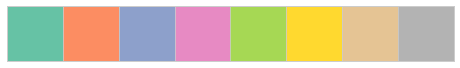

In [5]:
sns.palplot(pal)

In [6]:
# Import AMPL libraries
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd

#import struct_utils
#import curate_data
#import dist_metrics

In [7]:
# # mount your google drive where input files are located 
# from google.colab import drive
# drive.mount('/content/gdrive')
# # view contents of google drive 
# #%ls /content/gdrive/MyDrive/MODAC/Safety_Screen_Targets

In [8]:
data_dir = '/home/sarkart4/CYP Data Curation/data/'
os.listdir(data_dir)

['id_le_na.bsv',
 'test_r2_score=-10.72.png',
 'bestclass_min.csv',
 'DTC_data.csv',
 'bestclass.csv',
 'raw_data.txt',
 'valid_r2_score=-10.72.png',
 'Ryan_UCSF.csv',
 'valid_r2_score=-10.78.png',
 'Copy of EXTERNAL_TEST_PREDICTION_FROM_BEST_MODELS.csv',
 'DTC_data.csv.1',
 'alldf_Butler_Ryan.csv',
 'DTC_data_14July2022.csv',
 'alldfmin_Butler_Ryan.csv',
 'test_r2_score=-10.78.png',
 'Ryan_new.csv']

In [9]:
# read data
original = pd.read_csv(data_dir + 'Ryan_UCSF.csv')
print(original.columns)
original

Index(['Molecule numbers', 'CDD Number', 'SMILES',
       'Cyp inhibition: 3A4 (midazolam) (µM)',
       'Cyp inhibition: 3A4 (testosterone) (µM)', 'Cyp inhibition: 2D6 (µM)',
       'Cyp inhibition: 2C9 (µM)', 'Cyp inhibition: 2C19 (µM)',
       'Cyp inhibition: 2C8 (µM)', 'Cyp inhibition: 2B6 (µM)',
       'Cyp inhibition: 1A2 (µM)'],
      dtype='object')


,Molecule numbers,CDD Number,SMILES,Cyp inhibition: 3A4 (midazolam) (µM),Cyp inhibition: 3A4 (testosterone) (µM),Cyp inhibition: 2D6 (µM),Cyp inhibition: 2C9 (µM),Cyp inhibition: 2C19 (µM),Cyp inhibition: 2C8 (µM),Cyp inhibition: 2B6 (µM),Cyp inhibition: 1A2 (µM)
0,SU20667-0215,NaN,CC#CCS(=O)(=O)C[C@@H]1CCCN(CC2=NC3=CC(OC(F)(F)...,> 10.0,> 10,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
1,SU20667-0213-01,NaN,CC(C)C#CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C...,3.53,2.1,4.69,> 10.0,8.75,> 10.0,9.54,> 10.0
2,SU20667-0205-01,NaN,[2H]C([2H])(N1CCC[C@H](C1)NS(=O)(=O)C=C)C1=NC2...,1.45,4.5,0.94,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
3,SU20667-0125-01,NaN,FC(F)(F)OC1=CC=C2NC(CN3CCC[C@H](C3)NS(=O)(=O)C...,NaN,NaN,2.26,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
4,SU20667-0110-01,NaN,F[C@@H]1CCN(CC(=O)NC2=CC=C(OC(F)(F)F)C=C2)C[C@...,> 10.0,> 10,11.2,> 10.0,> 10.0,> 10.0,> 10.0,20.3
5,SU20667-0095-01,NaN,C=CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C(C=C1...,4.84,17,22.4,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
6,SU20667-0088-01,NaN,FC(F)(F)OC1=CC=C(NC(=O)CN2CCC[C@H](C2)NS(=O)(=...,> 10.0,17,12.5,> 10.0,> 10.0,> 10.0,> 10.0,2.08
7,SU20667-0083-01,NaN,F[C@@H]1CCN(C[C@@H]1NS(=O)(=O)C=C)C(=O)NC1=CC=...,> 10.0,> 10,10.9,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
8,SU20667-0067-01,NaN,FC(F)(F)OC1=CC=C(NC(=O)N2CCC(F)(F)C(C2)NS(=O)(...,> 10.0,> 10,10.3,> 10.0,22.6,> 10.0,> 10.0,> 10.0
9,SU20667-0066-01,NaN,FC(F)(F)OC1=CC=C(NC(=O)N2CC(CC(F)(F)C2)NS(=O)(...,15.6,> 10,15.8,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0


In [10]:
# make annoying column headings better format
original = original.fillna(0)
original.columns = original.columns.str.replace(':', '')
original.columns = original.columns.str.replace('\(', '')
original.columns = original.columns.str.replace('\)', '')
original.columns = original.columns.str.replace(' ','_') # get rid of annoying spaces in column names
original.columns = original.columns.str.replace('Cyp_inhibition_', '') # get rid of repeated keywords, for simplicity
print(original.shape)
print(original.columns)
original

(15, 11)
Index(['Molecule_numbers', 'CDD_Number', 'SMILES', '3A4_midazolam_µM',
       '3A4_testosterone_µM', '2D6_µM', '2C9_µM', '2C19_µM', '2C8_µM',
       '2B6_µM', '1A2_µM'],
      dtype='object')


,Molecule_numbers,CDD_Number,SMILES,3A4_midazolam_µM,3A4_testosterone_µM,2D6_µM,2C9_µM,2C19_µM,2C8_µM,2B6_µM,1A2_µM
0,SU20667-0215,0.0,CC#CCS(=O)(=O)C[C@@H]1CCCN(CC2=NC3=CC(OC(F)(F)...,> 10.0,> 10,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
1,SU20667-0213-01,0.0,CC(C)C#CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C...,3.53,2.1,4.69,> 10.0,8.75,> 10.0,9.54,> 10.0
2,SU20667-0205-01,0.0,[2H]C([2H])(N1CCC[C@H](C1)NS(=O)(=O)C=C)C1=NC2...,1.45,4.5,0.94,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
3,SU20667-0125-01,0.0,FC(F)(F)OC1=CC=C2NC(CN3CCC[C@H](C3)NS(=O)(=O)C...,0,0,2.26,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
4,SU20667-0110-01,0.0,F[C@@H]1CCN(CC(=O)NC2=CC=C(OC(F)(F)F)C=C2)C[C@...,> 10.0,> 10,11.2,> 10.0,> 10.0,> 10.0,> 10.0,20.3
5,SU20667-0095-01,0.0,C=CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C(C=C1...,4.84,17,22.4,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
6,SU20667-0088-01,0.0,FC(F)(F)OC1=CC=C(NC(=O)CN2CCC[C@H](C2)NS(=O)(=...,> 10.0,17,12.5,> 10.0,> 10.0,> 10.0,> 10.0,2.08
7,SU20667-0083-01,0.0,F[C@@H]1CCN(C[C@@H]1NS(=O)(=O)C=C)C(=O)NC1=CC=...,> 10.0,> 10,10.9,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0
8,SU20667-0067-01,0.0,FC(F)(F)OC1=CC=C(NC(=O)N2CCC(F)(F)C(C2)NS(=O)(...,> 10.0,> 10,10.3,> 10.0,22.6,> 10.0,> 10.0,> 10.0
9,SU20667-0066-01,0.0,FC(F)(F)OC1=CC=C(NC(=O)N2CC(CC(F)(F)C2)NS(=O)(...,15.6,> 10,15.8,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0


# # we do not have any relation column, so, create one for each 

In [11]:
print(original.shape)
#'> 10.0' type:str | sepeate > and 10 in different columns
print("\nSplitting each uM column into two different columns [relation, value]:")
edited = original.copy(deep=True)
#edited['3A4_testosterone_µM'] = edited['3A4_testosterone_µM'].str.strip() # ToDo

numaric_cols = []
for col in original.columns[3:]: # transform only uM value columns
    print(col)
    if col == '3A4_testosterone_µM':
        continue
    edited[col+'_value'] = edited[col]
    edited.loc[edited[col] == '> 10.0', col+'_relation'] = '>'
    edited.loc[edited[col] != '> 10.0', col+'_relation'] = '='
    edited.loc[edited[col] == '> 10.0', col+'_value'] = '10.0'
    # recast value column as numaric
    edited[col+'_value']= edited[col+'_value'].astype(float)   
    #edited.drop([col], axis=1)
    #print(edited[[col, col+'_relation', col+'_value']])
    numaric_cols.append(str(col+'_value'))
    
print(edited.shape)
edited.iloc[:, 4:]

(15, 11)

Splitting each uM column into two different columns [relation, value]:
3A4_midazolam_µM
3A4_testosterone_µM
2D6_µM
2C9_µM
2C19_µM
2C8_µM
2B6_µM
1A2_µM
(15, 25)


,3A4_testosterone_µM,2D6_µM,2C9_µM,2C19_µM,2C8_µM,2B6_µM,1A2_µM,3A4_midazolam_µM_value,3A4_midazolam_µM_relation,2D6_µM_value,2D6_µM_relation,2C9_µM_value,2C9_µM_relation,2C19_µM_value,2C19_µM_relation,2C8_µM_value,2C8_µM_relation,2B6_µM_value,2B6_µM_relation,1A2_µM_value,1A2_µM_relation
0,> 10,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>
1,2.1,4.69,> 10.0,8.75,> 10.0,9.54,> 10.0,3.53,=,4.69,=,10.00,>,8.75,=,10.00,>,9.54,=,10.00,>
2,4.5,0.94,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,1.45,=,0.94,=,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>
3,0,2.26,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,0.00,=,2.26,=,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>
4,> 10,11.2,> 10.0,> 10.0,> 10.0,> 10.0,20.3,10.00,>,11.20,=,10.00,>,10.00,>,10.00,>,10.00,>,20.30,=
5,17,22.4,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,4.84,=,22.40,=,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>
6,17,12.5,> 10.0,> 10.0,> 10.0,> 10.0,2.08,10.00,>,12.50,=,10.00,>,10.00,>,10.00,>,10.00,>,2.08,=
7,> 10,10.9,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,10.00,>,10.90,=,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>
8,> 10,10.3,> 10.0,22.6,> 10.0,> 10.0,> 10.0,10.00,>,10.30,=,10.00,>,22.60,=,10.00,>,10.00,>,10.00,>
9,> 10,15.8,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,15.60,=,15.80,=,10.00,>,10.00,>,10.00,>,10.00,>,10.00,>


In [12]:
numaric_cols

['3A4_midazolam_µM_value',
 '2D6_µM_value',
 '2C9_µM_value',
 '2C19_µM_value',
 '2C8_µM_value',
 '2B6_µM_value',
 '1A2_µM_value']

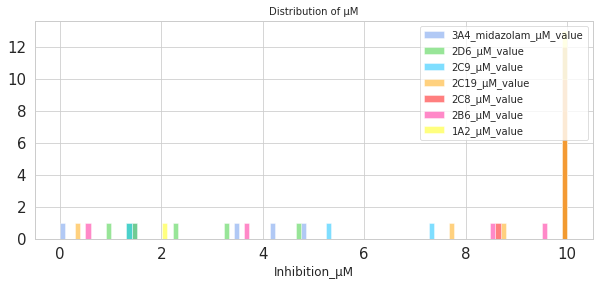

In [66]:
fig, ax = plt.subplots(figsize = (10,4))
fontsize=10
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
bins = np.linspace(0, 10, 100)

plt.hist(edited['3A4_midazolam_µM_value'].to_numpy(), bins, alpha=0.5, label='3A4_midazolam_µM_value', color='cornflowerblue')
plt.hist(edited['2D6_µM_value'].to_numpy(), bins, alpha=0.5, label='2D6_µM_value', color='limegreen')
plt.hist(edited['2C9_µM_value'].to_numpy(), bins, alpha=0.5, label='2C9_µM_value', color='deepskyblue')
plt.hist(edited['2C19_µM_value'].to_numpy(), bins, alpha=0.5, label='2C19_µM_value', color='orange')
plt.hist(edited['2C8_µM_value'].to_numpy(), bins, alpha=0.5, label='2C8_µM_value', color='red')
plt.hist(edited['2B6_µM_value'].to_numpy(), bins, alpha=0.5, label='2B6_µM_value', color='deeppink')
plt.hist(edited['1A2_µM_value'].to_numpy(), bins, alpha=0.5, label='1A2_µM_value', color='yellow')

plt.legend(loc='upper right', prop={'size': 10})
plt.title('Distribution of µM')
plt.xlabel('Inhibition_µM')
#plt.ylabel('frequency')
plt.show()

In [14]:
#get the values column names 
names = ['3A4_midazolam','2D6','2C9','2C19','2C8','2B6','1A2']
names

['3A4_midazolam', '2D6', '2C9', '2C19', '2C8', '2B6', '1A2']

# Convert µM to pIC50
pIC50 is the negative log of the IC50 value in molar.


In [63]:
for col in names:
    print(col)
    edited[col+'_pIC50_value'] = -np.log10(edited[col+'_µM_value']/10000000) # conversion
    edited[col+'_pIC50_value'] = edited[col+'_pIC50_value'].replace(np.inf, 0) # take care of values with no measurement
    edited[col+'_pIC50_value'] = edited[col+'_pIC50_value'].round(2)
    # flip arrows and fix punctuation for relation column to reflect pValues not normal values
    edited.loc[edited[col+'_µM_relation'] == '>', col+'_pIC50_relation'] = '<'
    edited.loc[edited[col+'_µM_relation'] == '=', col+'_pIC50_relation'] = '='
    edited.loc[edited[col+'_µM_relation'] == '<', col+'_pIC50_relation'] = '>'
    
    #print(edited[[col+'_µM_relation', col+'_µM_value',col+'_pIC50_relation',col+'_pIC50_value']])
edited.head(5)

3A4_midazolam
2D6
2C9
2C19
2C8
2B6
1A2


,Molecule_numbers,CDD_Number,SMILES,3A4_midazolam_µM,3A4_testosterone_µM,2D6_µM,2C9_µM,2C19_µM,2C8_µM,2B6_µM,1A2_µM,3A4_midazolam_µM_value,3A4_midazolam_µM_relation,2D6_µM_value,2D6_µM_relation,2C9_µM_value,2C9_µM_relation,2C19_µM_value,2C19_µM_relation,2C8_µM_value,2C8_µM_relation,2B6_µM_value,2B6_µM_relation,1A2_µM_value,1A2_µM_relation,3A4_midazolam_pIC50_value,3A4_midazolam_pIC50_relation,2D6_pIC50_value,2D6_pIC50_relation,2C9_pIC50_value,2C9_pIC50_relation,2C19_pIC50_value,2C19_pIC50_relation,2C8_pIC50_value,2C8_pIC50_relation,2B6_pIC50_value,2B6_pIC50_relation,1A2_pIC50_value,1A2_pIC50_relation
0,SU20667-0215,0.0,CC#CCS(=O)(=O)C[C@@H]1CCCN(CC2=NC3=CC(OC(F)(F)...,> 10.0,> 10,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,10.00,>,10.00,>,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,6.00,<,6.00,<,6.0,<,6.00,<,6.0,<,6.00,<,6.00,<
1,SU20667-0213-01,0.0,CC(C)C#CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C...,3.53,2.1,4.69,> 10.0,8.75,> 10.0,9.54,> 10.0,3.53,=,4.69,=,10.0,>,8.75,=,10.0,>,9.54,=,10.0,>,6.45,=,6.33,=,6.0,<,6.06,=,6.0,<,6.02,=,6.00,<
2,SU20667-0205-01,0.0,[2H]C([2H])(N1CCC[C@H](C1)NS(=O)(=O)C=C)C1=NC2...,1.45,4.5,0.94,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,1.45,=,0.94,=,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,6.84,=,7.03,=,6.0,<,6.00,<,6.0,<,6.00,<,6.00,<
3,SU20667-0125-01,0.0,FC(F)(F)OC1=CC=C2NC(CN3CCC[C@H](C3)NS(=O)(=O)C...,0,0,2.26,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,0.00,=,2.26,=,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,0.00,=,6.65,=,6.0,<,6.00,<,6.0,<,6.00,<,6.00,<
4,SU20667-0110-01,0.0,F[C@@H]1CCN(CC(=O)NC2=CC=C(OC(F)(F)F)C=C2)C[C@...,> 10.0,> 10,11.2,> 10.0,> 10.0,> 10.0,> 10.0,20.3,10.00,>,11.20,=,10.0,>,10.00,>,10.0,>,10.00,>,20.3,=,6.00,<,5.95,=,6.0,<,6.00,<,6.0,<,6.00,<,5.69,=


In [64]:
edited.to_csv(data_dir+'Ryan_new.csv')
edited.head(5)
#type(edited['3A4_midazolam_pIC50_value'][3])

,Molecule_numbers,CDD_Number,SMILES,3A4_midazolam_µM,3A4_testosterone_µM,2D6_µM,2C9_µM,2C19_µM,2C8_µM,2B6_µM,1A2_µM,3A4_midazolam_µM_value,3A4_midazolam_µM_relation,2D6_µM_value,2D6_µM_relation,2C9_µM_value,2C9_µM_relation,2C19_µM_value,2C19_µM_relation,2C8_µM_value,2C8_µM_relation,2B6_µM_value,2B6_µM_relation,1A2_µM_value,1A2_µM_relation,3A4_midazolam_pIC50_value,3A4_midazolam_pIC50_relation,2D6_pIC50_value,2D6_pIC50_relation,2C9_pIC50_value,2C9_pIC50_relation,2C19_pIC50_value,2C19_pIC50_relation,2C8_pIC50_value,2C8_pIC50_relation,2B6_pIC50_value,2B6_pIC50_relation,1A2_pIC50_value,1A2_pIC50_relation
0,SU20667-0215,0.0,CC#CCS(=O)(=O)C[C@@H]1CCCN(CC2=NC3=CC(OC(F)(F)...,> 10.0,> 10,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,10.00,>,10.00,>,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,6.00,<,6.00,<,6.0,<,6.00,<,6.0,<,6.00,<,6.00,<
1,SU20667-0213-01,0.0,CC(C)C#CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C...,3.53,2.1,4.69,> 10.0,8.75,> 10.0,9.54,> 10.0,3.53,=,4.69,=,10.0,>,8.75,=,10.0,>,9.54,=,10.0,>,6.45,=,6.33,=,6.0,<,6.06,=,6.0,<,6.02,=,6.00,<
2,SU20667-0205-01,0.0,[2H]C([2H])(N1CCC[C@H](C1)NS(=O)(=O)C=C)C1=NC2...,1.45,4.5,0.94,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,1.45,=,0.94,=,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,6.84,=,7.03,=,6.0,<,6.00,<,6.0,<,6.00,<,6.00,<
3,SU20667-0125-01,0.0,FC(F)(F)OC1=CC=C2NC(CN3CCC[C@H](C3)NS(=O)(=O)C...,0,0,2.26,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,0.00,=,2.26,=,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,0.00,=,6.65,=,6.0,<,6.00,<,6.0,<,6.00,<,6.00,<
4,SU20667-0110-01,0.0,F[C@@H]1CCN(CC(=O)NC2=CC=C(OC(F)(F)F)C=C2)C[C@...,> 10.0,> 10,11.2,> 10.0,> 10.0,> 10.0,> 10.0,20.3,10.00,>,11.20,=,10.0,>,10.00,>,10.0,>,10.00,>,20.3,=,6.00,<,5.95,=,6.0,<,6.00,<,6.0,<,6.00,<,5.69,=


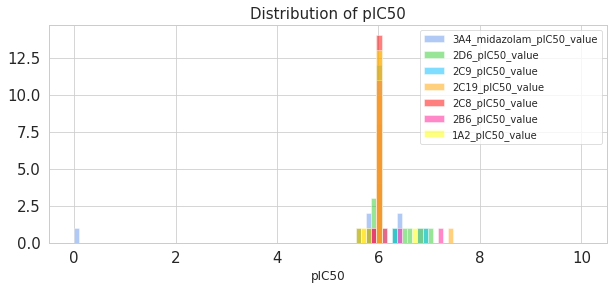

In [65]:
# plot converted values 

fig, ax = plt.subplots(figsize = (10,4))
fontsize=15
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
bins = np.linspace(0, 10, 100)

plt.hist(edited['3A4_midazolam_pIC50_value'].to_numpy(), bins, alpha=0.5, label='3A4_midazolam_pIC50_value', color='cornflowerblue')
plt.hist(edited['2D6_pIC50_value'].to_numpy(), bins, alpha=0.5, label='2D6_pIC50_value', color='limegreen')
plt.hist(edited['2C9_pIC50_value'].to_numpy(), bins, alpha=0.5, label='2C9_pIC50_value', color='deepskyblue')
plt.hist(edited['2C19_pIC50_value'].to_numpy(), bins, alpha=0.5, label='2C19_pIC50_value', color='orange')
plt.hist(edited['2C8_pIC50_value'].to_numpy(), bins, alpha=0.5, label='2C8_pIC50_value', color='red')
plt.hist(edited['2B6_pIC50_value'].to_numpy(), bins, alpha=0.5, label='2B6_pIC50_value', color='deeppink')
plt.hist(edited['1A2_pIC50_value'].to_numpy(), bins, alpha=0.5, label='1A2_pIC50_value', color='yellow')

plt.legend(loc='upper right', prop={'size': 10})
plt.title('Distribution of pIC50')
plt.xlabel('pIC50')
#plt.ylabel('frequency')
plt.show()

# Skip this part now. Each compound have measurement in all classes
## find best class for each compound 
## get max of pIC50 value and return the class

In [18]:
edited.columns

Index(['Molecule_numbers', 'CDD_Number', 'SMILES', '3A4_midazolam_µM',
       '3A4_testosterone_µM', '2D6_µM', '2C9_µM', '2C19_µM', '2C8_µM',
       '2B6_µM', '1A2_µM', '3A4_midazolam_µM_value',
       '3A4_midazolam_µM_relation', '2D6_µM_value', '2D6_µM_relation',
       '2C9_µM_value', '2C9_µM_relation', '2C19_µM_value', '2C19_µM_relation',
       '2C8_µM_value', '2C8_µM_relation', '2B6_µM_value', '2B6_µM_relation',
       '1A2_µM_value', '1A2_µM_relation', '3A4_midazolam_pIC50_value',
       '3A4_midazolam_pIC50_relation', '2D6_pIC50_value', '2D6_pIC50_relation',
       '2C9_pIC50_value', '2C9_pIC50_relation', '2C19_pIC50_value',
       '2C19_pIC50_relation', '2C8_pIC50_value', '2C8_pIC50_relation',
       '2B6_pIC50_value', '2B6_pIC50_relation', '1A2_pIC50_value',
       '1A2_pIC50_relation'],
      dtype='object')

In [39]:
# bestclass = edited[['3A4_midazolam_pIC50_value',
#                     '2D6_pIC50_value',
#                     '2C9_pIC50_value']]

# bestclass['max_pIC50'] = bestclass.max(axis=1)

# # find the column name of maximum values in every row
# maxValueIndex = bestclass.idxmax(axis = 1)
# bestclass['maxValueIndex'] = maxValueIndex
# bestclass['maxValueIndex'] = bestclass['maxValueIndex'].str.replace('_pIC50_value', '')
# bestclass['maxValueIndex'] = bestclass['maxValueIndex'].str.replace('_midazolam', '')
# bestclass['maxValueIndex'] ='CYP' + bestclass['maxValueIndex'].astype(str)
# bestclass.to_csv(data_dir + 'bestclass.csv')
# #bestclass

In [60]:
edited.round(2)
edited.head(5)

,Molecule_numbers,CDD_Number,SMILES,3A4_midazolam_µM,3A4_testosterone_µM,2D6_µM,2C9_µM,2C19_µM,2C8_µM,2B6_µM,1A2_µM,3A4_midazolam_µM_value,3A4_midazolam_µM_relation,2D6_µM_value,2D6_µM_relation,2C9_µM_value,2C9_µM_relation,2C19_µM_value,2C19_µM_relation,2C8_µM_value,2C8_µM_relation,2B6_µM_value,2B6_µM_relation,1A2_µM_value,1A2_µM_relation,3A4_midazolam_pIC50_value,3A4_midazolam_pIC50_relation,2D6_pIC50_value,2D6_pIC50_relation,2C9_pIC50_value,2C9_pIC50_relation,2C19_pIC50_value,2C19_pIC50_relation,2C8_pIC50_value,2C8_pIC50_relation,2B6_pIC50_value,2B6_pIC50_relation,1A2_pIC50_value,1A2_pIC50_relation
0,SU20667-0215,0.0,CC#CCS(=O)(=O)C[C@@H]1CCCN(CC2=NC3=CC(OC(F)(F)...,> 10.0,> 10,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,10.00,>,10.00,>,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,6.000000,<,6.000000,<,6.0,<,6.000000,<,6.0,<,6.000000,<,6.000000,<
1,SU20667-0213-01,0.0,CC(C)C#CS(=O)(=O)N[C@@H]1CCCN(C1)C(=O)NC1=CC=C...,3.53,2.1,4.69,> 10.0,8.75,> 10.0,9.54,> 10.0,3.53,=,4.69,=,10.0,>,8.75,=,10.0,>,9.54,=,10.0,>,6.452225,=,6.328827,=,6.0,<,6.057992,=,6.0,<,6.020452,=,6.000000,<
2,SU20667-0205-01,0.0,[2H]C([2H])(N1CCC[C@H](C1)NS(=O)(=O)C=C)C1=NC2...,1.45,4.5,0.94,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,1.45,=,0.94,=,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,6.838632,=,7.026872,=,6.0,<,6.000000,<,6.0,<,6.000000,<,6.000000,<
3,SU20667-0125-01,0.0,FC(F)(F)OC1=CC=C2NC(CN3CCC[C@H](C3)NS(=O)(=O)C...,0,0,2.26,> 10.0,> 10.0,> 10.0,> 10.0,> 10.0,0.00,=,2.26,=,10.0,>,10.00,>,10.0,>,10.00,>,10.0,>,0.000000,=,6.645892,=,6.0,<,6.000000,<,6.0,<,6.000000,<,6.000000,<
4,SU20667-0110-01,0.0,F[C@@H]1CCN(CC(=O)NC2=CC=C(OC(F)(F)F)C=C2)C[C@...,> 10.0,> 10,11.2,> 10.0,> 10.0,> 10.0,> 10.0,20.3,10.00,>,11.20,=,10.0,>,10.00,>,10.0,>,10.00,>,20.3,=,6.000000,<,5.950782,=,6.0,<,6.000000,<,6.0,<,6.000000,<,5.692504,=


# predicted vs. actual from Butler Students 

In [74]:
prediction = pd.read_csv(data_dir + 'Copy of EXTERNAL_TEST_PREDICTION_FROM_BEST_MODELS.csv')
print(prediction.columns)
prediction.shape

Index(['CYP3A4_valid_pred', 'CYP3A4_test_pred', 'CYP2D6_valid_pred',
       'CYP2D6_test_pred', 'CYP2C9_valid_pred', 'CYP2C9_test_pred'],
      dtype='object')


(18, 6)

In [75]:
# they have predicted on Ryan's 15 + 3 new. We have baseline measurements for only 15, so we will ignore last 3 

# Dropping last 3 rows using drop
prediction = prediction.round(2)
prediction.tail(3).to_csv(data_dir+'threeNew.csv')
prediction.drop(prediction.tail(3).index,inplace = True)
prediction

,CYP3A4_valid_pred,CYP3A4_test_pred,CYP2D6_valid_pred,CYP2D6_test_pred,CYP2C9_valid_pred,CYP2C9_test_pred
0,5.25,5.01,5.33,5.29,5.07,5.05
1,5.00,5.01,5.02,5.00,5.02,4.99
2,5.09,5.02,5.22,5.21,5.07,5.00
3,4.94,4.99,5.22,5.22,4.99,5.04
4,5.00,4.99,5.18,5.20,5.11,5.07
5,5.18,5.06,4.97,4.92,5.01,5.01
6,5.02,4.98,5.12,5.12,5.04,5.04
7,4.63,4.87,5.02,5.00,5.04,5.11
8,4.61,4.96,5.10,5.09,5.03,5.09
9,4.74,4.96,5.14,5.07,5.08,5.07


In [73]:
# #find best class according to valid
# bestclass_valid = prediction[['CYP3A4_valid_pred','CYP2D6_valid_pred', 'CYP2C9_valid_pred']]

# # find the column name of maximum values in every row
# bestclass_valid['max_pIC50_valid'] = bestclass_valid.max(axis=1)
# maxValueIndex = bestclass_valid.idxmax(axis = 1)
# bestclass_valid['maxValueIndex_valid'] = maxValueIndex
# bestclass_valid['maxValueIndex_valid'] = bestclass_valid['maxValueIndex_valid'].str.replace('_valid_pred', '')
# #bestclass_valid

In [37]:
# #find best class according to test 
# bestclass_test = prediction[['CYP3A4_test_pred','CYP2D6_test_pred', 'CYP2C9_test_pred']]

# # find the column name of maximum values in every row
# bestclass_test['max_pIC50_test'] = bestclass_test.max(axis=1)
# maxValueIndex = bestclass_test.idxmax(axis = 1)
# bestclass_test['maxValueIndex_test'] = maxValueIndex
# bestclass_test['maxValueIndex_test'] = bestclass_test['maxValueIndex_test'].str.replace('_test_pred', '')
# #bestclass_test

In [38]:
# # combile all to a dataframe 
# alldf = pd.DataFrame()
# alldf['max_pIC50'] = bestclass['max_pIC50']
# alldf['max_pIC50_valid'] = bestclass_valid['max_pIC50_valid']
# alldf['max_pIC50_test'] = bestclass_test['max_pIC50_test']

# alldf['maxValueIndex'] = bestclass['maxValueIndex']
# alldf['maxValueIndex_valid'] = bestclass_valid['maxValueIndex_valid']
# alldf['maxValueIndex_test'] = bestclass_test['maxValueIndex_test']
# alldf = alldf.round(decimals=1)
# alldf.to_csv(data_dir + 'alldf_Butler_Ryan.csv')
# #alldf
# #type(alldf['max_pIC50_test'][2])

# r2 score

In [78]:
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error, roc_auc_score, adjusted_rand_score, f1_score 
from sklearn.metrics import roc_curve, precision_recall_curve

r2_CYP3A4_valid = np.round(r2_score(edited['3A4_midazolam_pIC50_value'], prediction['CYP3A4_valid_pred']), 2)
print("r2_CYP3A4_valid", r2_CYP3A4_valid)
r2_CYP3A4_test = np.round(r2_score(edited['3A4_midazolam_pIC50_value'], prediction['CYP3A4_test_pred']), 2)
print("r2_CYP3A4_test", r2_CYP3A4_valid)

r2_CYP2D6_valid = np.round(r2_score(edited['2D6_pIC50_value'], prediction['CYP2D6_valid_pred']), 2)
print("r2_CYP2D6_valid", r2_CYP2D6_valid)
r2_CYP2D6_test = np.round(r2_score(edited['2D6_pIC50_value'], prediction['CYP2D6_test_pred']), 2)
print("r2_CYP2D6_test", r2_CYP2D6_valid)

r2_CYP2C9_valid = np.round(r2_score(edited['2C9_pIC50_value'], prediction['CYP2C9_valid_pred']), 2)
print("r2_CYP2C9_valid", r2_CYP2C9_valid)
r2_CYP2C9_test = np.round(r2_score(edited['2C9_pIC50_value'], prediction['CYP2C9_test_pred']), 2)
print("r2_CYP2C9_test", r2_CYP2C9_valid)

r2_CYP3A4_valid -0.28
r2_CYP3A4_test -0.28
r2_CYP2D6_valid -6.59
r2_CYP2D6_test -6.59
r2_CYP2C9_valid -21.42
r2_CYP2C9_test -21.42


# mse

In [192]:
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error, roc_auc_score, adjusted_rand_score, f1_score 
from sklearn.metrics import roc_curve, precision_recall_curve

r2_CYP3A4_valid = np.round(accuracy_score(edited['3A4_midazolam_pIC50_value'], prediction['CYP3A4_valid_pred']), 2)
print("r2_CYP3A4_valid", r2_CYP3A4_valid)
r2_CYP3A4_test = np.round(accuracy_score(edited['3A4_midazolam_pIC50_value'], prediction['CYP3A4_test_pred']), 2)
print("r2_CYP3A4_test", r2_CYP3A4_valid)

r2_CYP2D6_valid = np.round(v(edited['2D6_pIC50_value'], prediction['CYP2D6_valid_pred']), 2)
print("r2_CYP2D6_valid", r2_CYP2D6_valid)
r2_CYP2D6_test = np.round(accuracy_score(edited['2D6_pIC50_value'], prediction['CYP2D6_test_pred']), 2)
print("r2_CYP2D6_test", r2_CYP2D6_valid)

r2_CYP2C9_valid = np.round(accuracy_score(edited['2C9_pIC50_value'], prediction['CYP2C9_valid_pred']), 2)
print("r2_CYP2C9_valid", r2_CYP2C9_valid)
r2_CYP2C9_test = np.round(accuracy_score(edited['2C9_pIC50_value'], prediction['CYP2C9_test_pred']), 2)
print("r2_CYP2C9_test", r2_CYP2C9_valid)

ValueError: continuous is not supported

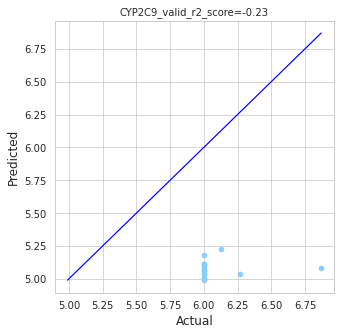

In [81]:
# plot
plt.figure(figsize=(5,5))
actual_value = edited['2C9_pIC50_value'] #alldf['max_pIC50']
predicted_value = prediction['CYP2C9_test_pred'] #alldf['max_pIC50_valid']
#actual_value = alldf['maxValueIndex']
#predicted_value = alldf['maxValueIndex_valid']

plt.scatter(actual_value, predicted_value, c='lightskyblue')
p1 = max(max(predicted_value), max(actual_value))
p2 = min(min(predicted_value), min(actual_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
title = 'CYP2C9_valid_r2_score='+str(np.round(r2_valid,2))
plt.title(title)
plt.savefig(data_dir+ title+'.png', dpi=300, transparent=False)
plt.show()

In [170]:
# READ ALL_DF FROM DISK
all_df = pd.read_csv(data_dir + 'alldf_Butler_Ryan.csv')
all_df.at[0,'maxValueIndex'] = 'CYP2D6'
all_df.at[7,'maxValueIndex'] = 'CYP2C9'

# all_df.maxValueIndex.replace(['CYP3A4', 'CYP2D6','CYP2C9'], [4,6,9], inplace=True)
# all_df.maxValueIndex_valid.replace(['CYP3A4', 'CYP2D6','CYP2C9'], [4,6,9], inplace=True)
# all_df.maxValueIndex_test.replace(['CYP3A4', 'CYP2D6','CYP2C9'], [4,6,9], inplace=True)

all_df

,Unnamed: 0,max_pIC50,max_pIC50_valid,max_pIC50_test,maxValueIndex,maxValueIndex_valid,maxValueIndex_test
0,0,6.0,5.3,5.3,CYP2D6,CYP2D6,CYP2D6
1,1,6.5,5.0,5.0,CYP3A4,CYP2D6,CYP3A4
2,2,7.0,5.2,5.2,CYP2D6,CYP2D6,CYP2D6
3,3,6.6,5.2,5.2,CYP2D6,CYP2D6,CYP2D6
4,4,6.0,5.2,5.2,CYP3A4,CYP2D6,CYP2D6
5,5,6.3,5.2,5.1,CYP3A4,CYP3A4,CYP3A4
6,6,6.0,5.1,5.1,CYP3A4,CYP2D6,CYP2D6
7,7,6.0,5.0,5.1,CYP2C9,CYP2C9,CYP2C9
8,8,6.0,5.1,5.1,CYP3A4,CYP2D6,CYP2C9
9,9,6.0,5.1,5.1,CYP2C9,CYP2D6,CYP2C9


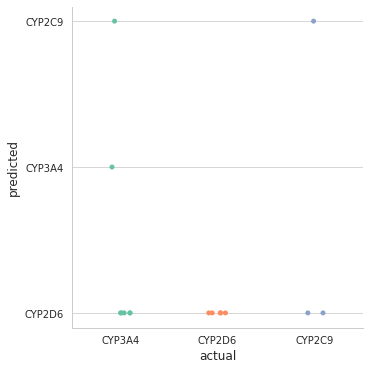

In [142]:
g = sns.catplot(x='maxValueIndex', y='maxValueIndex_valid', data=alldf, legend=True);
(g.set_axis_labels("actual", "predicted")
  .set_titles("myplot"));

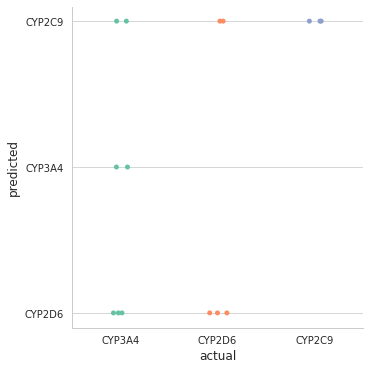

In [143]:
g = sns.catplot(x='maxValueIndex', y='maxValueIndex_test', data=alldf, legend=True);
(g.set_axis_labels("actual", "predicted")
  .set_titles("myplot"));

# precision, recall, F2-score

In [138]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [160]:
from sklearn import metrics

y_true = alldf['maxValueIndex']
y_pred = alldf['maxValueIndex_test']

# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=2))

[[3 0 0]
 [2 3 0]
 [2 3 2]]
              precision    recall  f1-score   support

      CYP2C9       0.43      1.00      0.60         3
      CYP2D6       0.50      0.60      0.55         5
      CYP3A4       1.00      0.29      0.44         7

    accuracy                           0.53        15
   macro avg       0.64      0.63      0.53        15
weighted avg       0.72      0.53      0.51        15



[[0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]]
0 0.6428571428571428
1 0.6499999999999999
2 0.8333333333333334
0 [0. 0. 1.] [0.         0.28571429 1.        ]
1 [0.  0.3 1. ] [0.  0.6 1. ]
2 [0.         0.33333333 1.        ] [0. 1. 1.]


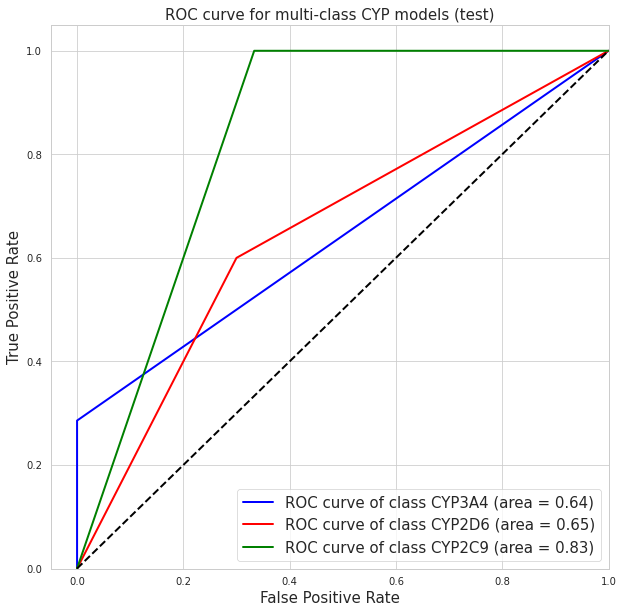

In [187]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

y_test = alldf['maxValueIndex']
y_score = alldf['maxValueIndex_test']

cls = ['CYP3A4', 'CYP2D6', 'CYP2C9']
n_classes = len(np.unique(y_test))
y_test = label_binarize(y_test, classes=['CYP3A4', 'CYP2D6', 'CYP2C9'])
y_score = label_binarize(y_score, classes=['CYP3A4', 'CYP2D6', 'CYP2C9'])
print(y_score)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(i, roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    print(i, fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'''.format(cls[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC curve for multi-class CYP models (test)', size=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

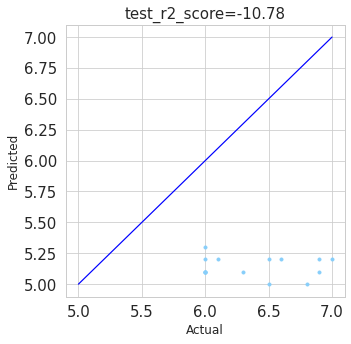

In [27]:
r2_test = np.round(r2_score(alldf['max_pIC50'], alldf['max_pIC50_test']), 2)
r2_test

 # plot
plt.figure(figsize=(5,5))
actual_value = alldf['max_pIC50']
predicted_value = alldf['max_pIC50_test']
plt.scatter(actual_value, predicted_value, c='lightskyblue', s=10)
p1 = max(max(predicted_value), max(actual_value))
p2 = min(min(predicted_value), min(actual_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
title = 'test_r2_score='+str(np.round(r2_valid,2))
plt.title(title)
plt.savefig(data_dir+ title+'.png', dpi=300, transparent=False)
plt.show()

# confusion matrix

[[3 0 0]
 [2 3 0]
 [2 3 2]]


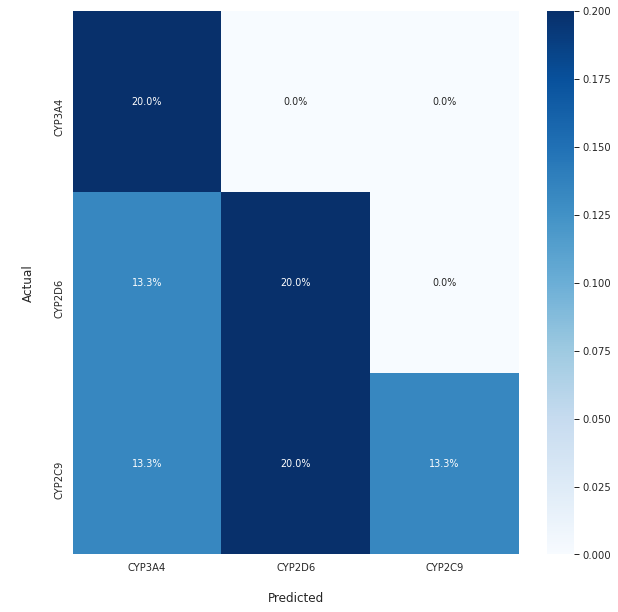

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Generate the confusion matrix based on valid 
actual_ = alldf['maxValueIndex'].to_numpy()
predicted_ = alldf['maxValueIndex_test'].to_numpy()
cf_matrix = confusion_matrix(actual_, predicted_)
print(cf_matrix)

# display confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix),  fmt='.1%', annot=True, cmap='Blues')
#ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('\nActual\n');
ax.xaxis.set_ticklabels(['CYP3A4','CYP2D6', 'CYP2C9'], size=10)
ax.yaxis.set_ticklabels(['CYP3A4','CYP2D6', 'CYP2C9'], size=10)
plt.show()

# bestclass based on min 

In [29]:
bc = edited[['3A4_midazolam_pIC50_value',
                    '2D6_pIC50_value',
                    '2C9_pIC50_value']]
bc['min_pIC50'] = bc.min(axis=1)
# find the column name of maximum values in every row
minValueIndex = bc.idxmin(axis = 1)
bc['minValueIndex'] = minValueIndex
bc['minValueIndex'] = bc['minValueIndex'].str.replace('_pIC50_value', '')
bc['minValueIndex'] = bc['minValueIndex'].str.replace('_midazolam', '')
bc['minValueIndex'] ='CYP' + bc['minValueIndex'].astype(str)
bc.to_csv(data_dir + 'bestclass_min.csv')


#find best class according to valid
bc_valid = prediction[['CYP3A4_valid_pred','CYP2D6_valid_pred', 'CYP2C9_valid_pred']]
# find the column name of maximum values in every row
bc_valid['min_pIC50_valid'] = bc_valid.min(axis=1)
minValueIndex = bc_valid.idxmin(axis = 1)
bc_valid['minValueIndex_valid'] = minValueIndex
bc_valid['minValueIndex_valid'] = bc_valid['minValueIndex_valid'].str.replace('_valid_pred', '')

#find best class according to test
bc_test = prediction[['CYP3A4_test_pred','CYP2D6_test_pred', 'CYP2C9_test_pred']]
# find the column name of maximum values in every row
bc_test['min_pIC50_test'] = bc_test.min(axis=1)
minValueIndex1 = bc_test.idxmin(axis = 1)
bc_test['minValueIndex_test'] = minValueIndex1
bc_test['minValueIndex_test'] = bc_test['minValueIndex_test'].str.replace('_test_pred', '')

In [30]:
# combile all to a dataframe 
alldfmin = pd.DataFrame()
alldfmin['min_pIC50'] = bc['min_pIC50']
alldfmin['min_pIC50_valid'] = bc_valid['min_pIC50_valid']
alldfmin['min_pIC50_test'] = bc_test['min_pIC50_test']

alldfmin['minValueIndex'] = bc['minValueIndex']
alldfmin['minValueIndex_valid'] = bc_valid['minValueIndex_valid']
alldfmin['minValueIndex_test'] = bc_test['minValueIndex_test']
alldfmin = alldfmin.round(decimals=1)
alldfmin.to_csv(data_dir + 'alldfmin_Butler_Ryan.csv')
alldfmin.head(2)
#type(alldf['max_pIC50_test'][2])

,min_pIC50,min_pIC50_valid,min_pIC50_test,minValueIndex,minValueIndex_valid,minValueIndex_test
0,6.0,5.1,5.0,CYP3A4,CYP2C9,CYP3A4
1,6.0,5.0,5.0,CYP2C9,CYP3A4,CYP2C9


In [31]:
r2_test = np.round(r2_score(alldfmin['min_pIC50'], alldfmin['min_pIC50_test']), 2)
r2_valid = np.round(r2_score(alldfmin['min_pIC50'], alldfmin['min_pIC50_valid']), 2)

[r2_valid, r2_test]

[-0.23, -0.16]

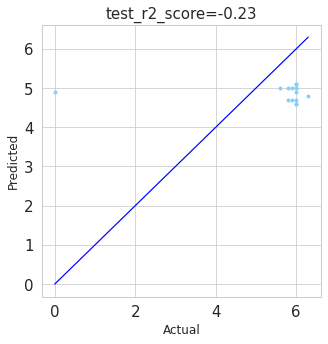

In [32]:
# plot
plt.figure(figsize=(5,5))
actual_value = alldfmin['min_pIC50']
predicted_value = alldfmin['min_pIC50_valid']
plt.scatter(actual_value, predicted_value, c='lightskyblue', s=10)
p1 = max(max(predicted_value), max(actual_value))
p2 = min(min(predicted_value), min(actual_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
title = 'test_r2_score='+str(np.round(r2_valid,2))
plt.title(title)
#plt.savefig(data_dir+ title+'.png', dpi=300, transparent=False)
plt.show()

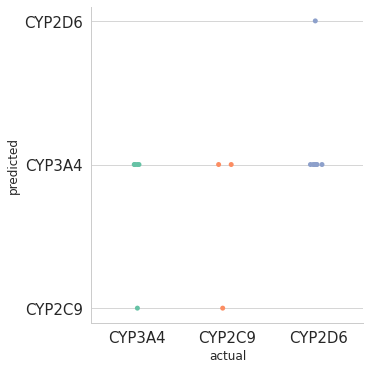

In [33]:
g = sns.catplot(x='minValueIndex', y='minValueIndex_valid', data=alldfmin, legend=True);
(g.set_axis_labels("actual", "predicted")
  .set_titles("myplot"));

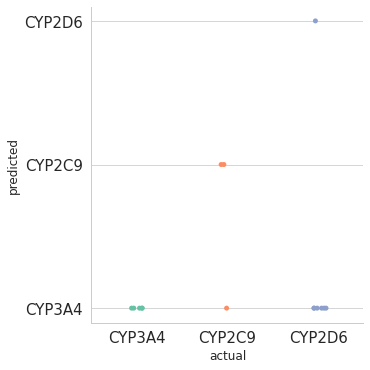

In [34]:
sns.color_palette("husl", 9)
g = sns.catplot(x='minValueIndex', y='minValueIndex_test', data=alldfmin);
(g.set_axis_labels("actual", "predicted")
  .set_titles("myplot"));

In [35]:
# from IPython.display import FileLink, FileLinks

# original['tmp'] = 1
# converted['tmp'] = 1

# new = pd.merge(original, converted, on=['tmp'])
# new = new.drop('tmp', axis=1)

# cols = ['Molecule numbers', 'CDD Number', 'SMILES',
#         'Cyp inhibition: 3A4 (midazolam) (µM)',
#         'Cyp inhibition: 3A4 (midazolam) (pIC50)',
#         'Cyp inhibition: 3A4 (testosterone) (µM)', 
#         'Cyp inhibition: 3A4 (testosterone) (pIC50)', 
#         'Cyp inhibition: 2D6 (µM)',
#         'Cyp inhibition: 2D6 (pIC50)',
#         'Cyp inhibition: 2C9 (µM)', 
#         'Cyp inhibition: 2C9 (pIC50)', 
#         'Cyp inhibition: 2C19 (µM)', 
#         'Cyp inhibition: 2C19 (pIC50)',
#         'Cyp inhibition: 2C8 (µM)', 
#         'Cyp inhibition: 2C8 (pIC50)', 
#         'Cyp inhibition: 2B6 (µM)',
#         'Cyp inhibition: 2B6 (pIC50)',
#         'Cyp inhibition: 1A2 (µM)', 
#         'Cyp inhibition: 1A2 (pIC50)']
# new = new[cols]
# new.to_csv(data_dir+'Ryan_new.csv', index=False)
# new